In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, f_regression
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

import eli5
from eli5.sklearn import PermutationImportance

import pickle

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [2]:
train = pd.read_csv(r"C:\Users\user\Desktop\Santender Project\train.csv")
test = pd.read_csv(r"C:\Users\user\Desktop\Santender Project\test.csv")
train.columns = train.columns.str.strip()

In [3]:
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


# lets check the shape of both test and train dataset

In [4]:
print("Train Dataset ",train.shape)
print("Test Dataset ",test.shape)

Train Dataset  (200000, 202)
Test Dataset  (200000, 201)


In [5]:
test.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


# lets check for the missing values

In [6]:
#Missing Percentage of all the features
def missing_percentage(df):     
    missing_total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([missing_total, percent], axis=1, keys=['Missing_Total','Percent'])

In [7]:
missing_percentage(train)
#train.isnull().sum().sum()

,Missing_Total,Percent


In [8]:
missing_percentage(test)
#test.isnull().sum().sum()

,Missing_Total,Percent


So We can clearly conclude that there is no missing value are present in training and test set!

So lets checks whether target columns is balanced or not.

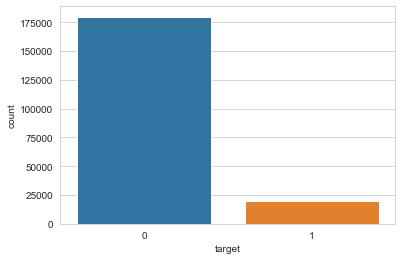

In [9]:
target = train['target']
#train = train.drop(["ID_code", "target"], axis=1)
sns.set_style('whitegrid')
sns.countplot(target)

In [10]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [11]:
#Check for imbalanced
def check_balance(df,target):
    check=[]
    print('size of data is:',df.shape[0] )
    for i in [0,1]:
        print('for target  {} ='.format(i))
        print(df[target].value_counts()[i]/df.shape[0]*100,'%')
    

In [12]:
check_balance(train, 'target')

size of data is: 200000
for target  0 =
89.95100000000001 %
for target  1 =
10.049 %


This is a Imbalanced target competition.

# Data Exploration

In [13]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [14]:
data_prep = [col for col in train.columns if col not in ['ID_code', 'target']]

#data_prep = train.drop(["target", "ID_code"], axis=1)
#data_prep.shape

In [15]:
#skewness and kurtosis
print("Skewness: %f" % train['target'].skew())
print("Kurtosis: %f" % train['target'].kurt())

Skewness: 2.657642
Kurtosis: 5.063112


# Distribution of test and train set for mean

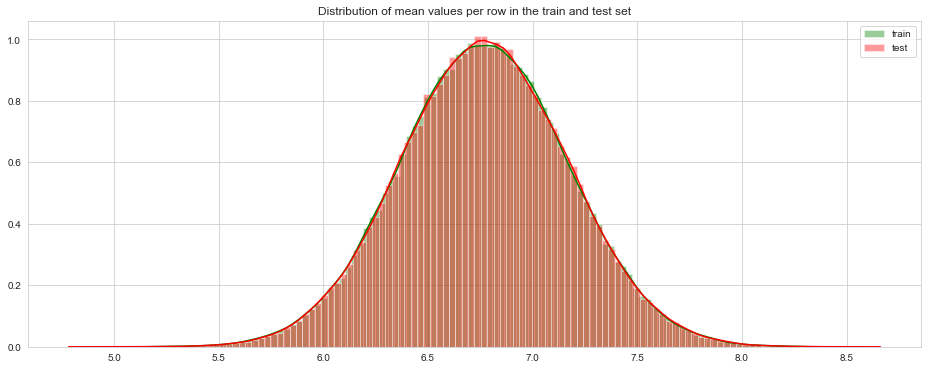

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[data_prep].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[data_prep].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution for Standard Deviation

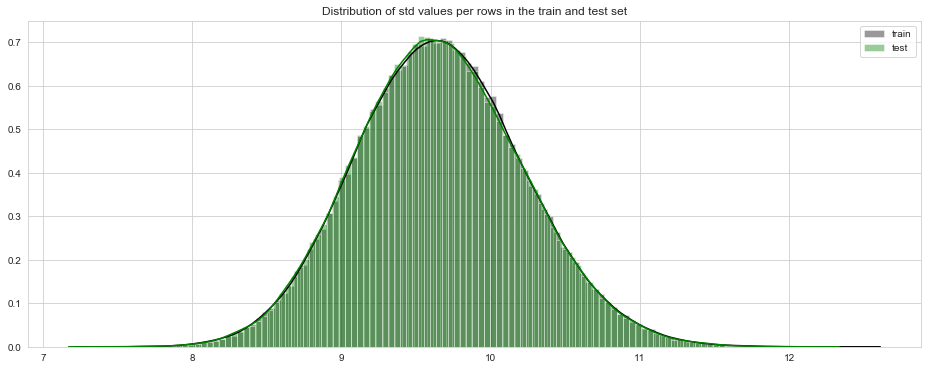

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per rows in the train and test set")
sns.distplot(train[data_prep].std(axis=1),color="black",kde=True,bins=120, label='train')
sns.distplot(test[data_prep].std(axis=1),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

# Distribution of skewness

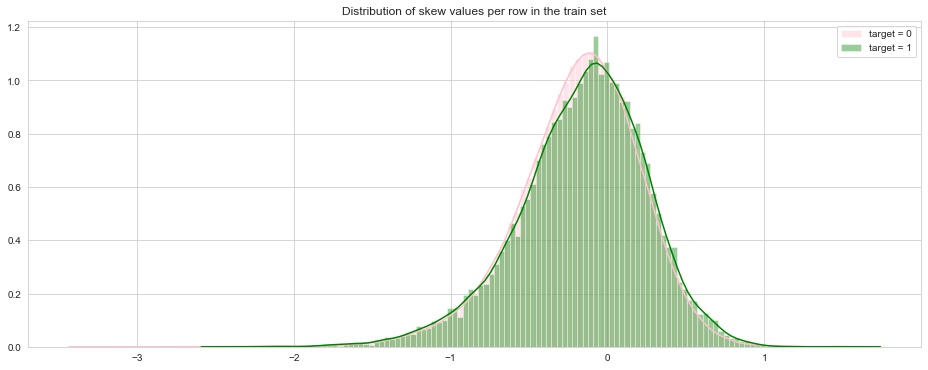

In [20]:
t0 = train.loc[target == 0]
t1 = train.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train set")
sns.distplot(t0[data_prep].skew(axis=1),color="pink", kde=True,bins=120, label='target = 0')
sns.distplot(t1[data_prep].skew(axis=1),color="green", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

# Distribution of kurtosis

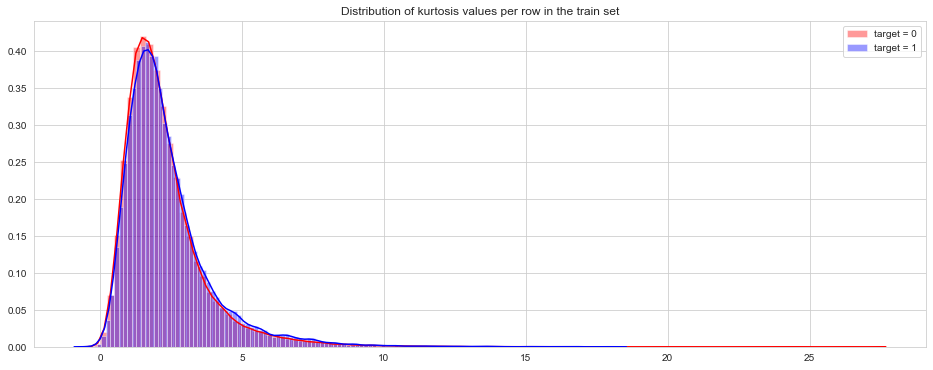

In [21]:
t0 = train.loc[target == 0]
t1 = train.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per row in the train set")
sns.distplot(t0[data_prep].kurtosis(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[data_prep].kurtosis(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

As there are nearly 200 columns so it will take lot of time to create model.
For that we have to check which feature is important.

In [23]:
X = train.drop(['ID_code', 'target'], axis = 1)
y = train['target']

In [24]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation    
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

#This method is used for selecting the Most important feature which affect the target value using PCA.
def fit_and_evaluate_select_k(model):
    
    # Train the model
    model.fit(X_train_pca, y_train_pca)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test_pca)
    model_cross = cross_val(X_train_pca, y_train_pca, model)
    
    # Return the performance metric
    return model_cross




#As our dataset is imbalanced so we used SMOTE
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate_smote(model):
    
    # Train the model
    model.fit(X_train_smote, Y_train_smote)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train_smote, Y_train_smote, model)
    
    # Return the performance metric
    return model_cross



def performance(Y_test, logist_pred):
    logist_pred_var = [0 if i < 0.5 else 1 for i in logist_pred]
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, logist_pred_var)) 
   
    fpr, tpr, thresholds = roc_curve(Y_test, logist_pred, pos_label=1)
    print('AUC:')
    print(auc(fpr, tpr))


In [25]:
#scaling dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
#Due to  logistic regression and it depends on euclidean distance so we scaled the value 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=2)

In [27]:
lr = LogisticRegression()
logistic_Regression = fit_and_evaluate(lr)

print('LogisticRegression Performance on the test set: Cross Validation Score = %0.4f' % logistic_Regression)

LogisticRegression Performance on the test set: Cross Validation Score = 0.9149


In [28]:
#Lets predict
Y_predict = lr.predict(X_test)

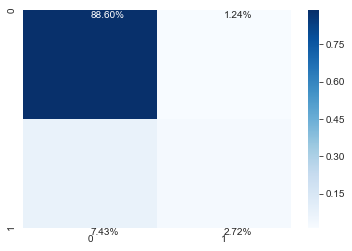

In [29]:
#Let us seaborn in confusion matrix
cm = confusion_matrix(y_test, Y_predict)
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm/np.sum(cm), annot=True, annot_kws=annot_kws,
           fmt='.2%', cmap='Blues')

In [30]:
performance(y_test, Y_predict)

#This model gave out an AUC of 0.626 on validation set

Confusion Matrix:
[[88603  1244]
 [ 7435  2718]]
AUC:
0.6269291834224049


AUC: 0.627


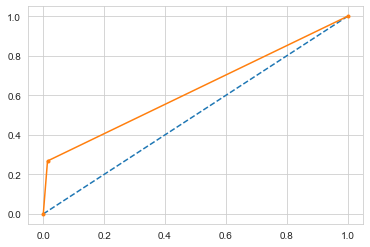

In [31]:
# calculate AUC
auc = roc_auc_score(y_test, Y_predict)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [32]:
perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=150)

Weight,Feature
0.0014 ± 0.0005,var_81
0.0013 ± 0.0004,var_139
0.0010 ± 0.0007,var_12
0.0009 ± 0.0005,var_53
0.0009 ± 0.0003,var_6
0.0009 ± 0.0003,var_146
0.0008 ± 0.0003,var_99
0.0007 ± 0.0004,var_26
0.0007 ± 0.0005,var_22
0.0007 ± 0.0002,var_166


1. As you move down the top of the graph, the importance of the feature decreases.
2. The features that are shown in green indicate that they have a positive impact on our prediction
3. The features that are shown in white indicate that they have no effect on our prediction
4. The features shown in red indicate that they have a negative impact on our prediction

Logistic Regression accuracy is 91 percent. Lets Check the Precision & Recall.

In [33]:
#classification report about the model 
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     89847
           1       0.69      0.27      0.39     10153

    accuracy                           0.91    100000
   macro avg       0.80      0.63      0.67    100000
weighted avg       0.90      0.91      0.90    100000



Precision is quite good 69 percent. But the as we know that your dataset is skewed, we have to concentrate on improving your F1 score. If your data is not skewed, only accuracy can be used to say whether a model is good or not.

So I decide to use SMOTE (Synthetic Minority Oversampling Technique) in this dataset. And Try to increase F1 score

In [34]:
#pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [35]:
X_train_smote, Y_train_smote = smote.fit_sample(X_train, y_train)

In [36]:
from collections import Counter
print("Before SMOTE ", Counter(y_train))
print("After SMOTE", Counter(Y_train_smote))

Before SMOTE  Counter({0: 90055, 1: 9945})
After SMOTE Counter({1: 90055, 0: 90055})


So Lets check Precision and F1 Score using Logitics Regression

In [37]:
lr_smote = LogisticRegression()
logistic_Regression_smote = fit_and_evaluate_smote(lr_smote)

print('LogisticRegression Performance on the SMOTE test set: Cross Validation Score = %0.4f' % logistic_Regression_smote)

LogisticRegression Performance on the SMOTE test set: Cross Validation Score = 0.7972


In [38]:
#Lets predict
Y_predict_smote = lr_smote.predict(X_test)

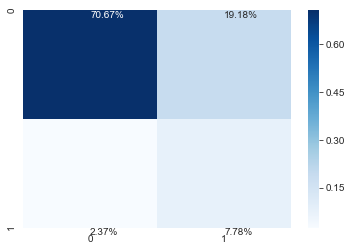

In [39]:
#After using SMOTE lets check the peformance
#Let us seaborn in confusion matrix
cm = confusion_matrix(y_test, Y_predict_smote)
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm/np.sum(cm), annot=True, annot_kws=annot_kws,
           fmt='.2%', cmap='Blues')

AUC: 0.777


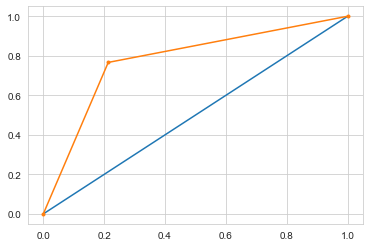

In [50]:
# calculate AUC
auc = roc_auc_score(y_test, Y_predict_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, Y_predict_smote)
# plot no skill
plt.plot([0, 1], [0, 1])
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [41]:
#classification report about the model 
print(classification_report(y_test, Y_predict_smote))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     89847
           1       0.29      0.77      0.42     10153

    accuracy                           0.78    100000
   macro avg       0.63      0.78      0.64    100000
weighted avg       0.90      0.78      0.82    100000



Precision is too low !!

Also the dataset is too big and taking a very long time to train the data. For that I have used PCA technique
to reduce the dimension. And again try to use logistic regression

In [42]:
pca = PCA(n_components= 100)

X_pca = pca.fit_transform(X_train_smote) 

In [43]:
X_pca

array([[-2.04691468,  0.54648748,  0.97848283, ..., -2.05681037,
        -1.34645688,  0.52260396],
       [ 0.40685338, -0.6053956 ,  0.45661433, ...,  0.77762713,
        -1.1660323 ,  0.40731746],
       [-0.31651525,  1.08412532,  2.47942463, ...,  0.24735023,
         1.98379348, -0.43826203],
       ...,
       [-1.37192477,  0.45966749, -1.22130343, ..., -0.41508099,
         1.65805346,  0.93757289],
       [ 0.34063835, -1.22834966, -0.8420262 , ...,  0.19215463,
        -0.53057395,  0.12511171],
       [-1.109944  ,  0.04248302, -1.17917363, ..., -0.04977111,
        -0.72250619, -0.64898425]])

In [44]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y_train_smote, test_size=0.3, random_state=2)

In [45]:
lr_pca = LogisticRegression()
logistic_Regression_pca = fit_and_evaluate_select_k(lr_pca)

print('LogisticRegression Performance on the test set: Cross Validation Score = %0.4f' % logistic_Regression_pca)

LogisticRegression Performance on the test set: Cross Validation Score = 0.7925


In [46]:
#Lets predict
Y_predict_pca = lr_pca.predict(X_test_pca)

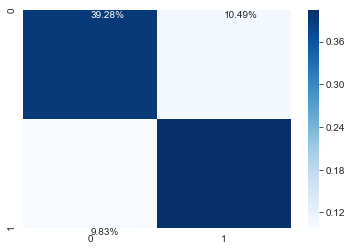

In [47]:
#Let us seaborn in confusion matrix
cm = confusion_matrix(y_test_pca, Y_predict_pca)
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm/np.sum(cm), annot=True, annot_kws=annot_kws,
           fmt='.2%', cmap='Blues')

AUC: 0.797


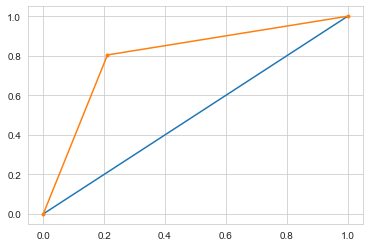

In [48]:
# calculate AUC
auc = roc_auc_score(y_test_pca, Y_predict_pca)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_pca, Y_predict_pca)
# plot no skill
plt.plot([0, 1], [0, 1])
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [52]:
#classification report about the model 
print(classification_report(y_test_pca, Y_predict_pca))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     26893
           1       0.79      0.80      0.80     27140

    accuracy                           0.80     54033
   macro avg       0.80      0.80      0.80     54033
weighted avg       0.80      0.80      0.80     54033



And after using the PCA technique our algorithm giving a better result with good Precision, Recall and F1-Score.

In [53]:
#Lets Check in Random Forest Classifier

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate_select_k(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8809


In [54]:
#Lets predict
Y_predict_rf = random.predict(X_test_pca)

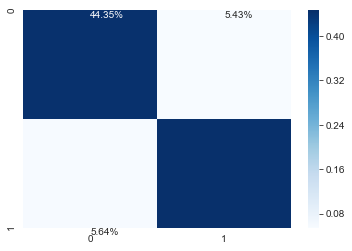

In [55]:
#Let us seaborn in confusion matrix
cm = confusion_matrix(y_test_pca, Y_predict_rf)
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm/np.sum(cm), annot=True, annot_kws=annot_kws,
           fmt='.2%', cmap='Blues')

AUC: 0.889


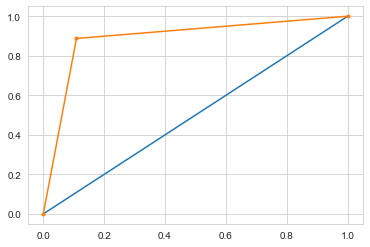

In [59]:
# calculate AUC
auc = roc_auc_score(y_test_pca, Y_predict_rf)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_pca, Y_predict_rf)
# plot no skill
plt.plot([0, 1], [0, 1])
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [57]:
#classification report about the model 
print(classification_report(y_test_pca, Y_predict_rf))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     26893
           1       0.89      0.89      0.89     27140

    accuracy                           0.89     54033
   macro avg       0.89      0.89      0.89     54033
weighted avg       0.89      0.89      0.89     54033



Random Forest is a great fit as the precision, recall, f1score are highly balance.

In [52]:
model=XGBClassifier(random_state=1,learning_rate=0.01)

xgBoost_Cross = fit_and_evaluate_select_k(model)
print('XGBClassifier Performance on the test set: Cross Validation Score = %0.4f' % xgBoost_Cross)

XGBClassifier Performance on the test set: Cross Validation Score = 0.8047


In [53]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train_pca, y_train_pca) 

svc_fit = fit_and_evaluate_select_k(clf)

print('SVC Performance on the test set: Cross Validation Score = %0.4f' % svc_fit)

SVC Performance on the test set: Cross Validation Score = 0.7960


So, I have evaluted 4 algorithms

1. Logistic Regression
2. Random Forest Classifier
3. XGBClassifier
4. SVC

But from the above algorithms Random Forest Classifier is good for evaluting because of Cross Validation Score of 85%.
As we know Logistic regression are used more often when we have cleanly and linearly separable classes. If we add more variables into the mix, which means that logistic regression performs worse under high dimensionality conditions. That means that typically we have to shift over to random forest if we have a lot of variables.

Fortunately we had a algorithm which is a good fit for our business module and that mean Random Forest Classifier is the best choice with good Precision, Recall and F1Score.

In [54]:
#Now it is time to test our algorithm using TEST set.
data_x_test = test.drop(columns = ['ID_code'])

#scaling dataset
sc = StandardScaler()
sc.fit(data_x_test)
X_scaled = sc.transform(data_x_test)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Reducing the dimension
pca = PCA(n_components= 100)
X_pca = pca.fit_transform(X_scaled) 


y_pred = random.predict(X_pca)
data_y = pd.DataFrame(y_pred)
df_submission = pd.merge(pd.DataFrame(test['ID_code']),data_y, left_index=True, right_index=True)

print(df_submission)

            ID_code  0
0            test_0  0
1            test_1  0
2            test_2  0
3            test_3  0
4            test_4  0
...             ... ..
199995  test_199995  0
199996  test_199996  0
199997  test_199997  1
199998  test_199998  0
199999  test_199999  0

[200000 rows x 2 columns]


# Now Lets Create the model and save it in a file


In [55]:
with open('model_santender_python', 'wb') as f:
    pickle.dump(random, f)

In [56]:
with open('model_santender_python', 'rb') as f:
    model_rf = pickle.load(f)

In [57]:
f.close

<function BufferedReader.close>